<a href="https://colab.research.google.com/github/DataAnalysis-python/soccer-FIFA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%9D%B4%EC%A0%81%EB%A3%8C%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

201904073 윤선미 
20190     김희성

목차 
1. 서론
  제안배경
  목적
  가설
2. 데이터 전처리
3. 데이터 분석
4, 데이터 시각화
5. 결론



1. 서론

이적료(Transfer Fee)

계약기간이 6개월 이상 남아 있는 프로선수가 소속된 팀과의 계약이 만료되지 않는 상황에서 다른 팀으로 옮기고자 할 때 선수를 영입하려는 새로운 구단이 원 소속구단에게 지급하는 비용

팀 내에서 부족한 팀 영입 이외에 티켓 판매부터 유니폼 판매, TV 중계료 및 광고료 등 선수  이적료 그 이상의 수입이 보장되기 때문에 구단의 비즈니스에 중요한 역할이 된다. 

목적 

데이터를 분석하여 이적료와 선수들의 간의 관계를 측정한다. 

가설 
1.  선수의 현재 능력치가 가장 영향을 많이 미칠 것이다. 
2. 선수의 계약 기간이 많이 남을 수록 더 많은 이적료가 요구될 것 이다. 


2. 데이터 전처리
2.1 데이터 정보 확인

In [16]:
import pandas as pd
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
train= pd.read_csv('/content/drive/MyDrive/데이콘/FIFA_train.csv')
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0



'age': '나이', 'stat_overall' : '선수의 현재 능력치' ,'stat_potential' : '선수의 발전 가능성', 'value' : '이적료', 
                      'continent' : '선수의 국적', 'contract_until' : '선수의 계약 기간', 'position' : '선수의 포지션',
                      'prefer_foot' : '선수의 주 발', 'reputation' : '선수의 유명도', 'stat_skill_moves' : '선수의 개인 능력'}

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8916 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               8916 non-null   int64   
 1   continent         8916 non-null   category
 2   contract_until    8916 non-null   int64   
 3   position          8916 non-null   category
 4   prefer_foot       8916 non-null   category
 5   reputation        8916 non-null   category
 6   stat_overall      8916 non-null   int64   
 7   stat_potential    8916 non-null   int64   
 8   stat_skill_moves  8916 non-null   float64 
 9   value             8916 non-null   float64 
 10  log_value         8916 non-null   float64 
dtypes: category(4), float64(3), int64(4)
memory usage: 592.8 KB


In [36]:
train.describe()

,age,contract_until,stat_overall,stat_potential,stat_skill_moves,value,log_value
count,8916.000000,8916.000000,8916.000000,8916.000000,8916.000000,8.916000e+03,8916.000000
mean,25.215231,2020.186967,67.069987,71.972185,2.400516,2.740282e+06,13.789016
std,4.636295,1.255714,6.834838,5.960734,0.774869,5.741952e+06,1.396847
min,16.000000,2018.000000,47.000000,48.000000,1.000000,1.000000e+04,9.210340
25%,21.000000,2019.000000,63.000000,68.000000,2.000000,3.750000e+05,12.834681
50%,25.000000,2020.000000,67.000000,72.000000,2.000000,8.250000e+05,13.623139
75%,28.250000,2021.000000,72.000000,76.000000,3.000000,2.600000e+06,14.771022
max,40.000000,2023.000000,94.000000,94.000000,5.000000,1.105000e+08,18.520526


In [20]:
##결측치 확인

train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [22]:
# 컬럼의 고유값 개수를 확인 

for col in train.columns:
  n_unique=len(train[col].unique())
  print(col,n_unique)

id 8932
name 8932
age 25
continent 5
contract_until 17
position 4
prefer_foot 2
reputation 5
stat_overall 46
stat_potential 45
stat_skill_moves 5
value 198


In [23]:
 # 필요없는 데이터 삭제
 
train.drop(['id','name'],axis=1,inplace=True)

In [25]:
#계약기간 type은 object 

train.contract_until.value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [26]:
# 계약기간의 기간을 yyyy로 고정

def func(string: str) -> int:
    string = str(string)[-4:]
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

In [27]:
#2024,2025,2026년도 데이터의 경우 전체 데이터 건수에 비해 값이 적음으로 분석 대상에서 제외

list=[2024,2025,2026]
train=train.loc[~train['contract_until'].isin(list)]

train['contract_until'].unique()


array([2021, 2020, 2019, 2023, 2022, 2018])

In [56]:
#범주형 데이터를 카테고리형으로 형변환
train['continent']=train['continent'].astype('category')
train['position'] = train['position'].astype('category')
train['prefer_foot'] = train['prefer_foot'].astype('category')
train['reputation']=train['reputation'].astype('category')

3. 데이터 분석

데이터 셋에 있는 선수들의 이적료 확인

가장 많은 이적료를 받는 선수는 이고 가장 적은 이적료를 받는 선수 는 


[Text(0.5, 1.0, 'log_value histplot')]

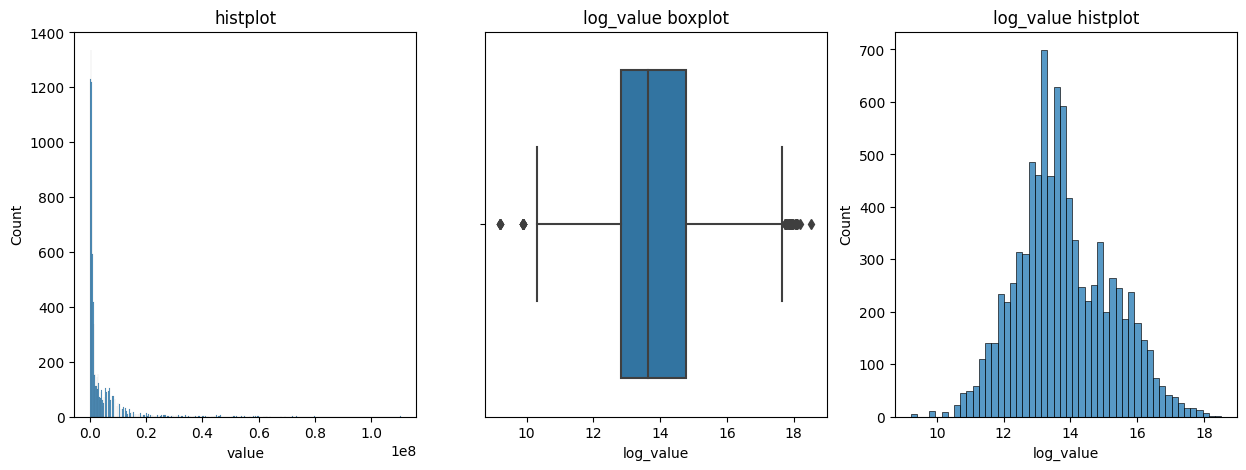

In [29]:
#이적료간의 편차가 존재한다. 


f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(15,5)

# 이적료에 log
train["log_value"] = np.log(train["value"])
sns.histplot(x="value", data=train, ax=axes[0])
axes[0].set(title = "histplot")
# 이상치 확인
sns.boxplot(x="log_value", data=train, ax=axes[1])
axes[1].set(title = "log_value boxplot")
#로그변환 
sns.histplot(x="log_value", data=train, ax=axes[2])
axes[2].set(title = "log_value histplot")


 reputation별 stat_ovall에 대한 선수 가치 

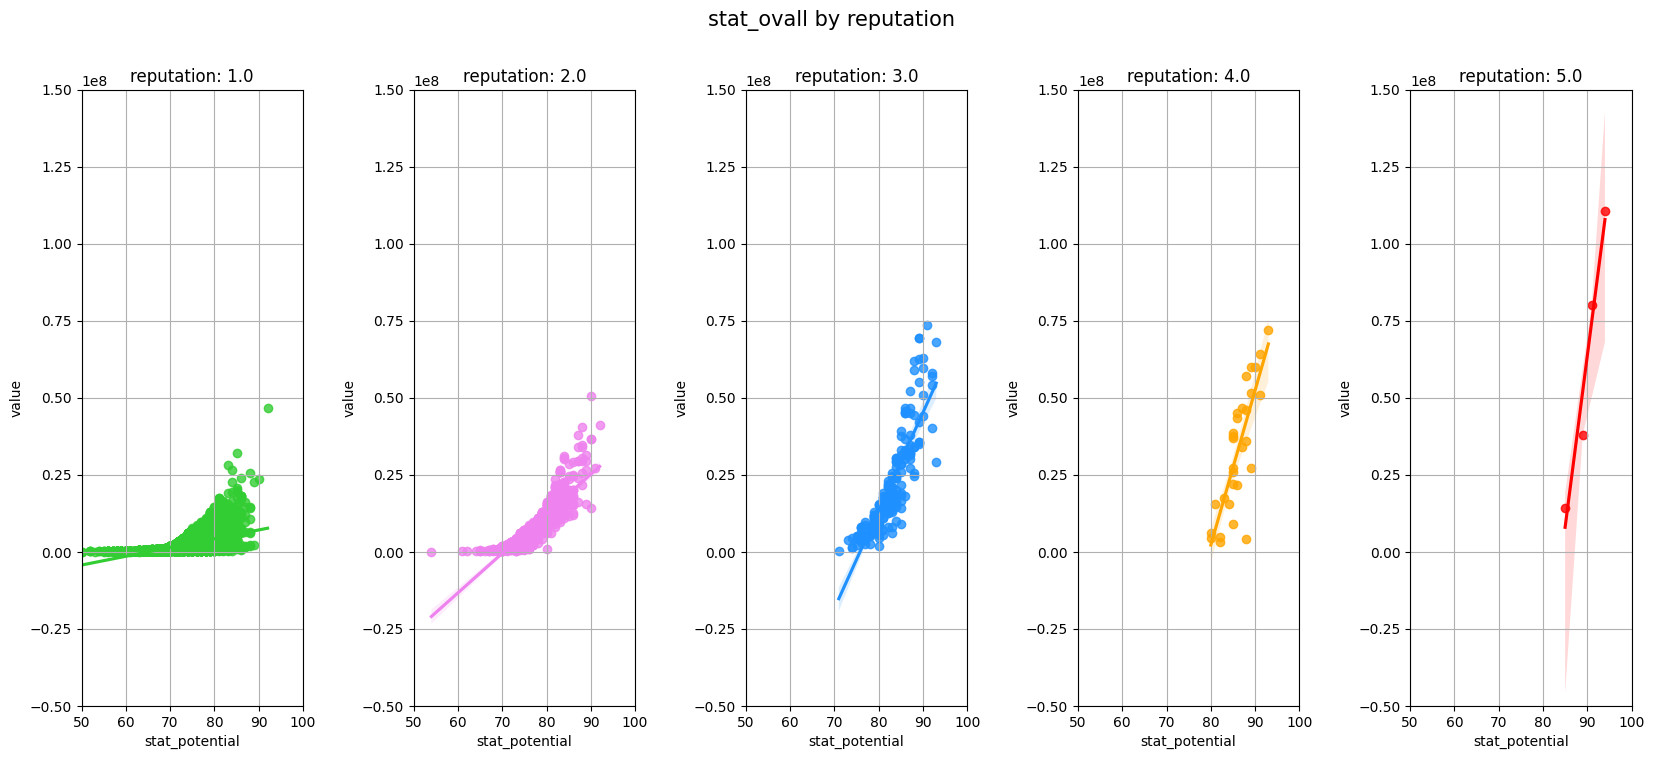

In [69]:
#reputation별 선수의 잠재능력의 가치

key=train.groupby('reputation').groups.keys()

color=['limegreen','violet','dodgerblue','orange','red']

fig, axs = plt.subplots( ncols=int(len(key)), 
    figsize=(20,8),gridspec_kw={'wspace': .5})

fig.suptitle('stat_ovall by reputation', size=15)

for i,y in enumerate(key):
    ax = axs[i]
    ax.set_title('reputation: '+str(y))
    ax.grid(True)
    ax.axis([50, 100, -50000000, 150000000])
    select_rep=train[train['reputation']==y]
    sns.regplot(x='stat_potential', y='value',color=color[i],
    data=select_rep, ax=ax)


reputation 인기등급별 현재 능력치를 나누어 보았을 때 높은 등급일 수록 좀더 가치있는 평가를 받았고 낮은 등급 일 수록 좁 더 

In [37]:
#이적료를 기준으로 다른 값들 평균 내리기 

higer=(train['value'])

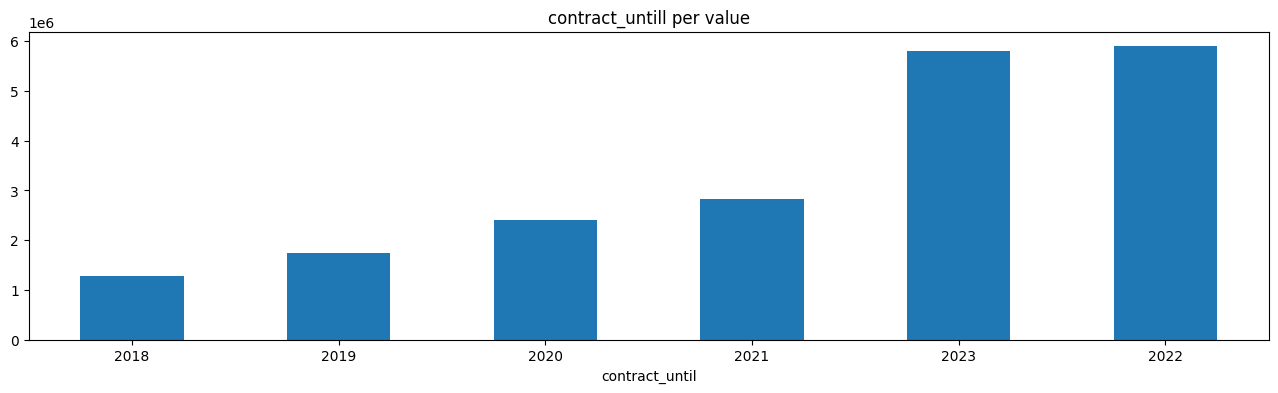

In [45]:
#계약연도를 기준으로 이적료의 평균을 반환
fig, ax = plt.subplots(figsize=(16,4))
(
train.groupby('contract_until')['value']
.agg(['mean','count'])
.sort_values('mean')
.plot.bar(y='mean',rot=0,legend=False,ax=ax,
          title='contract_untill per value')

)

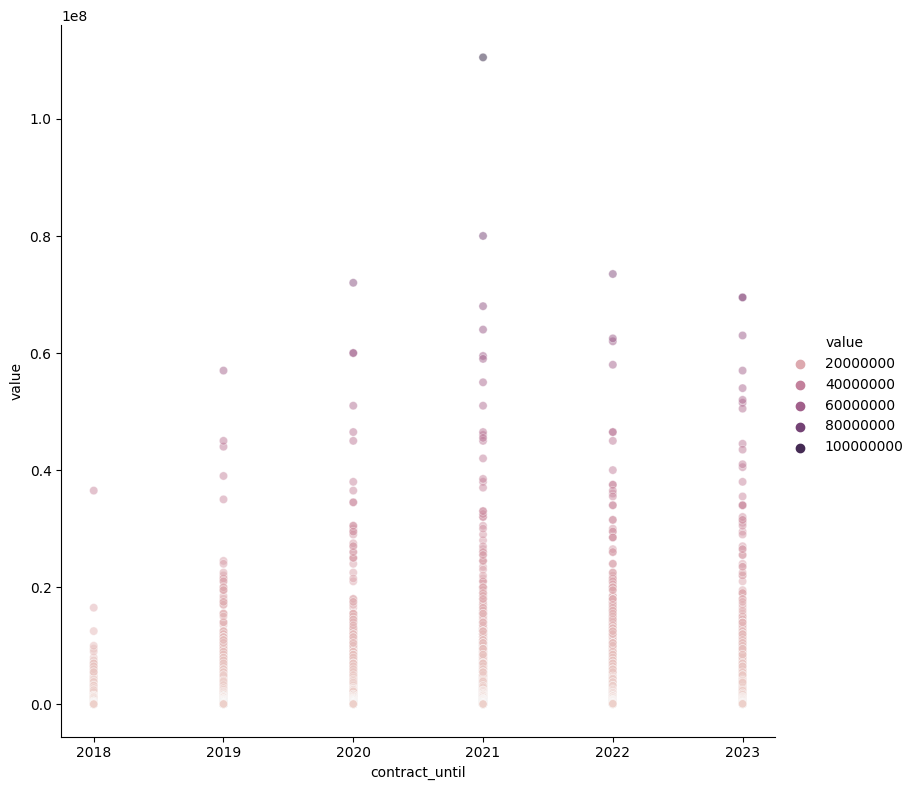

In [73]:
#그룹별 평균 이적률은 23년이 가장 높지만 가장 높은 이적률을 찍고 있는 사람은 
sns.relplot(
    x='contract_until',
    y='value',
    data=train,
    hue='value',
    alpha=.5,
    height=8
)


In [95]:
#이적료가 높은 선수들의 
col=['stat_overall','stat_potential','stat_skill_moves','reputation','value']
train[col].sort_values('value', ascending=False).head(100)

,stat_overall,stat_potential,stat_skill_moves,reputation,value
0,94,94,4.0,5.0,110500000.0
2,91,91,3.0,5.0,80000000.0
17,88,91,4.0,3.0,73500000.0
1,91,93,1.0,4.0,72000000.0
18,88,89,5.0,3.0,69500000.0
...,...,...,...,...,...
79,84,87,1.0,3.0,27000000.0
172,82,85,4.0,4.0,27000000.0
140,82,91,2.0,2.0,27000000.0
13,89,89,2.0,4.0,27000000.0


In [96]:
train.corr().style.background_gradient(cmap='Blues_r')
# 이적료가 높은 선수들을 레이더 차트로 나타내기 연관관계가 강한 컬럼과의

<ipython-input-96-4666ed1dd7fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().style.background_gradient(cmap='Blues_r')


,age,contract_until,stat_overall,stat_potential,stat_skill_moves,value,log_value
age,1.000000,-0.129047,0.471002,-0.229959,0.041103,0.092290,0.187539
contract_until,-0.129047,1.000000,0.149115,0.248625,0.078431,0.212758,0.206002
stat_overall,0.471002,0.149115,1.000000,0.662961,0.400152,0.657019,0.938128
stat_potential,-0.229959,0.248625,0.662961,1.000000,0.331386,0.607918,0.791753
stat_skill_moves,0.041103,0.078431,0.400152,0.331386,1.000000,0.300817,0.476815
value,0.092290,0.212758,0.657019,0.607918,0.300817,1.000000,0.693249
log_value,0.187539,0.206002,0.938128,0.791753,0.476815,0.693249,1.000000


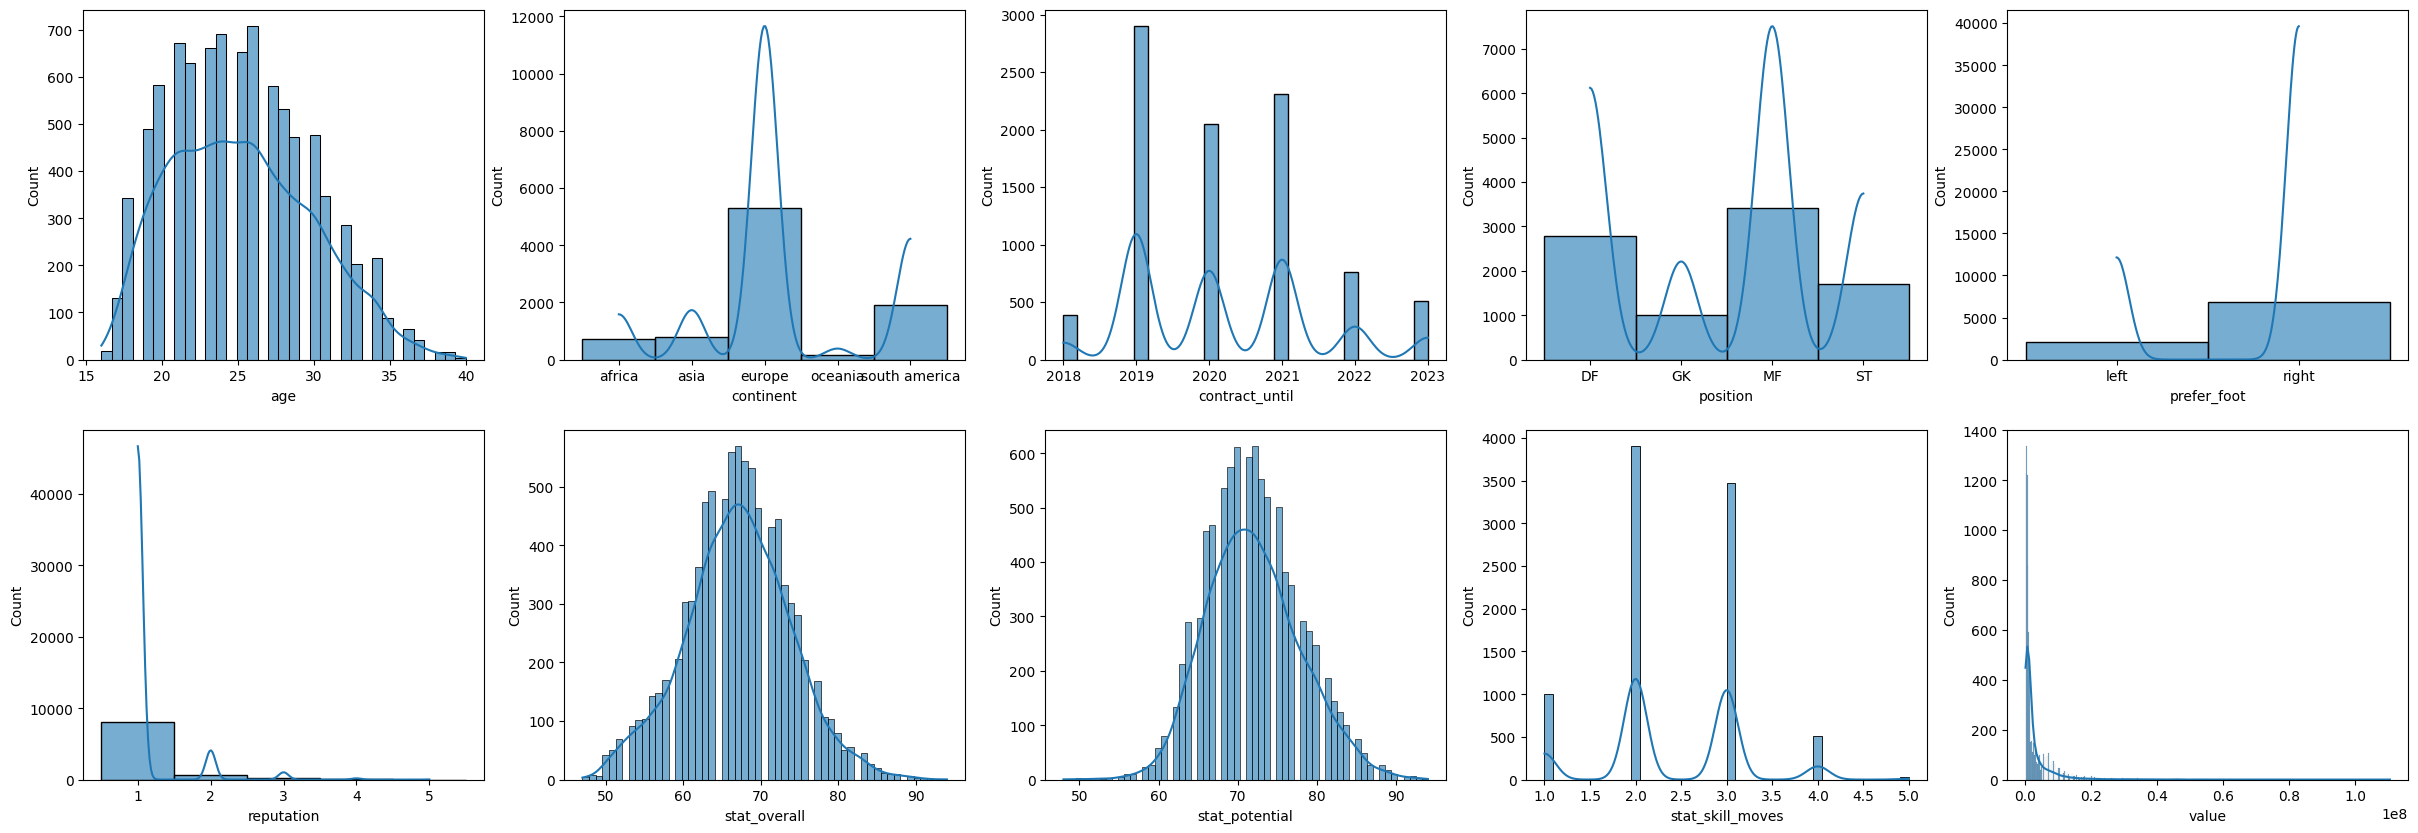

In [55]:
# 데이터 세트 시각화

X=train
y = train['value']

f, axes = plt.subplots(2,5, figsize=(30,10)) 
axes = axes.flatten()
for col,ax in zip(X.columns, axes):
    sns.histplot(data = X, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()